### Testing 3D data type 



### First test a steady case - 5 deg AoA

In [1]:
include("../src/UNSflow.jl")
    

UNSflow

In [2]:
using UNSflow

### Run a 2D case first

In [3]:
alphadef = ConstDef(5.*pi/180)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kinemdef = KinemDef(alphadef, hdef, udef) 
pvt = 0.0 #leading edge
lespcrit = [18.;]
surf = TwoDSurf("FlatPlate", pvt, kinemdef,lespcrit)
curfield = TwoDFlowField()
nsteps = Int(round(10./0.015))
mat2d, surf2d, curfield2d = ldvm(surf, curfield, nsteps)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in sumabs2j at /Users/kramesh/.julia/v0.5/NLsolve/src/utils.jl:1 [inlined]
 in trust_region_(::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Float64, ::Bool) at /Users/kramesh/.julia/v0.5/NLsolve/src/trust_region.jl:105
 in #nlsolve#17(::Symbol, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Function, ::Float64, ::Bool, ::NLsolve.#nlsolve, ::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}) at /Users/kramesh/.julia/v0.5/NLsolve/src/nlsolve_func_defs.jl:24
 in ldvm(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64, ::Float64, ::UNSflow.DelVortDef, ::Array{Float64,2}, ::Float64) at /Users/kramesh/Documents/Workspace/UNSflow/src/solvers.jl:399
 in ldvm(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64) at /Users/kramesh/Documents/Workspace/UNSflow/src/solvers.jl:3

(
[0.015 0.0872665 … 0.83672 -4.4864; 0.03 0.0872665 … 0.0142337 -0.0913623; … ; 9.99 0.0872665 … 0.00278776 -0.128292; 10.005 0.0872665 … 0.00278366 -0.128304],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.ConstDef(0.08726646259971647),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.08726646259971647,0.0,0.0,0.0,1.0,0.0),[-11.005,-11.0045,-11.0029,-11.0004,-10.9968,-10.9921,-10.9865,-10.9799,-10.9723,-10.9638  …  -10.05,-

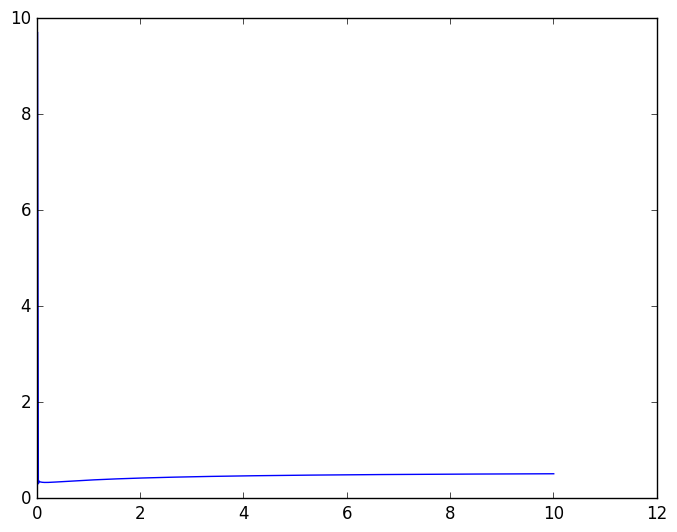

0.5142235022388082

In [4]:
plot(mat2d[:,1],mat2d[:,6])
mat2d[end,6]

In [5]:
# Theoretical value (2*pi*alpha) = 0.5483
# 2D value = 0.5142
# Error = 6% lower

In [6]:
cref = 1.
bref = 10.
sref = 10.

patch1 = patch(0., -5., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = ConstDef(5.*pi/180)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)





UNSflow.KinemDef3D(UNSflow.ConstDef(0.08726646259971647),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0])

In [47]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,10./dtstar) + 1
mat3d, surf3d, field3d = LLT_ldvm(surf, field, nsteps, dtstar)


[-0.0386017,-0.0170444,-0.00876589,-0.00521152,-0.00352153,-0.00260816,-0.00208657,-0.00177012,-0.00158451,-0.00148374,-0.00145335,-0.00148374,-0.00158451,-0.00177012,-0.00208657,-0.00260816,-0.00352153,-0.00521152,-0.00876589,-0.0170444,-0.0386017]
[0.002682,-1.23877e-16,0.000723499,2.20501e-16,0.000325639,7.9125e-17,0.00016791,1.42857e-16,9.23761e-5,1.00549e-16,5.28352e-5,8.00829e-17,3.09138e-5,-9.55608e-17,1.81617e-5,-8.885e-18,1.03577e-5,-6.18616e-17,5.2591e-6,-8.52646e-19,1.58138e-6]
[-0.037183,-0.0159022,-0.00805501,-0.00475708,-0.00320936,-0.00237543,-0.00190096,-0.00161275,-0.0014441,-0.00135228,-0.00132477,-0.00135228,-0.0014441,-0.00161275,-0.00190096,-0.00237543,-0.00320936,-0.00475708,-0.00805501,-0.0159022,-0.037183]
[0.00245916,-4.66844e-16,0.000673094,-4.48371e-16,0.000308255,-2.79512e-16,0.000161715,-3.4295e-16,9.03901e-5,-1.36481e-16,5.24172e-5,-1.14102e-16,3.10232e-5,8.31161e-17,1.83941e-5,5.10397e-17,1.05646e-5,-5.31075e-17,5.39188e-6,-1.24908e-18,1.62688e-6]
[-0.037

LoadError: LoadError: InterruptException:
while loading In[47], in expression starting on line 5

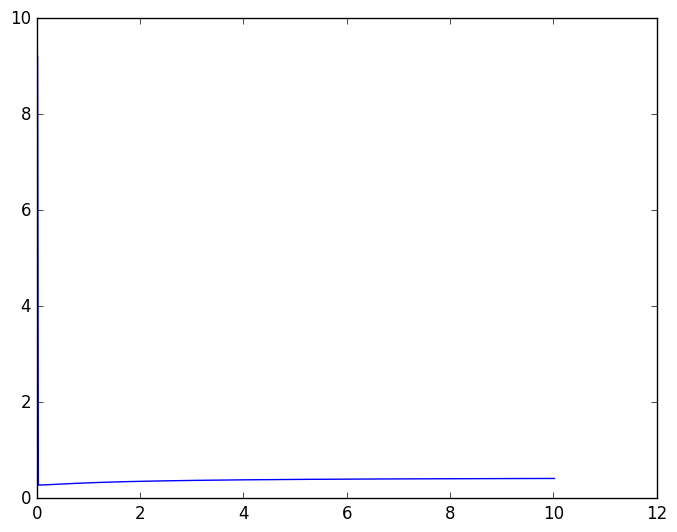

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32f84f710>

In [40]:
plot(mat3d[:,1],mat3d[:,2])

In [10]:
# Theoretical value = 0.4569
# 3D value from LLT = 0.4164
# 8% error lower


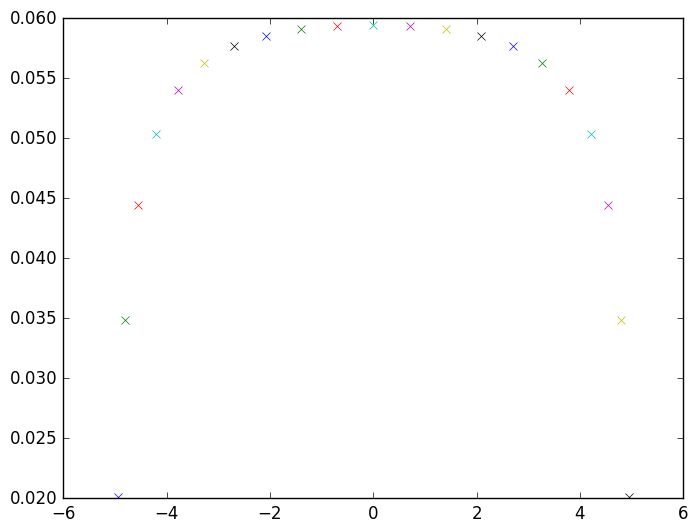

In [11]:
for i = 1:surf.nspan
    plot(surf.yle[i], surf3d[i].a0[1], "x")
end

In [44]:
### Now try the pitch ramp case


In [50]:
alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kinemdef = KinemDef(alphadef, hdef, udef) 
pvt = 0.0 #leading edge
lespcrit = [18.;]
surf = TwoDSurf("FlatPlate", pvt, kinemdef,lespcrit)

curfield = TwoDFlowField()
dtstar = 0.0075
nsteps = Int(round(2.5/0.0075))
mat2d, surf2d, curfield2d = ldvm(surf, curfield, nsteps, dtstar)

(
[0.0075 7.36966e-13 … 1.60487e-21 -1.2598e-9; 0.015 8.86735e-13 … 3.63266e-22 -2.58442e-10; … ; 2.49 0.785398 … 0.579155 -0.819253; 2.4975 0.785398 … 0.577698 -0.819015],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.7853980148910488,0.0,3.664239987121668e-6,0.0,1.0,0.0),[-3.4975,-3.49713,-3.49604,-3.49421,-3.49165,-3.4883

In [51]:
cref = 1.
bref = 10.
sref = 10.

patch1 = patch(0., -5., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = ConstDef(5.*pi/180)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)






UNSflow.KinemDef3D(UNSflow.ConstDef(0.08726646259971647),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0])

In [ ]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,10./dtstar) + 1
mat3d, surf3d, field3d = LLT_ldvm(surf, field, nsteps, dtstar)



[-0.0386017,-0.0170444,-0.00876589,-0.00521152,-0.00352153,-0.00260816,-0.00208657,-0.00177012,-0.00158451,-0.00148374,-0.00145335,-0.00148374,-0.00158451,-0.00177012,-0.00208657,-0.00260816,-0.00352153,-0.00521152,-0.00876589,-0.0170444,-0.0386017]
[0.002682,-1.23877e-16,0.000723499,2.20501e-16,0.000325639,7.9125e-17,0.00016791,1.42857e-16,9.23761e-5,1.00549e-16,5.28352e-5,8.00829e-17,3.09138e-5,-9.55608e-17,1.81617e-5,-8.885e-18,1.03577e-5,-6.18616e-17,5.2591e-6,-8.52646e-19,1.58138e-6]
[-0.037183,-0.0159022,-0.00805501,-0.00475708,-0.00320936,-0.00237543,-0.00190096,-0.00161275,-0.0014441,-0.00135228,-0.00132477,-0.00135228,-0.0014441,-0.00161275,-0.00190096,-0.00237543,-0.00320936,-0.00475708,-0.00805501,-0.0159022,-0.037183]
[0.00245916,-4.66844e-16,0.000673094,-4.48371e-16,0.000308255,-2.79512e-16,0.000161715,-3.4295e-16,9.03901e-5,-1.36481e-16,5.24172e-5,-1.14102e-16,3.10232e-5,8.31161e-17,1.83941e-5,5.10397e-17,1.05646e-5,-5.31075e-17,5.39188e-6,-1.24908e-18,1.62688e-6]
[-0.037

In [ ]:
plot(mat3d[:,1], mat3d[:,2])

In [ ]:
2.5/0.075